In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df_match_winners = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/Notebook/match_winner.csv')
df_match_winners

,Unnamed: 0,match_id,match_winner,player_id
0,0,12260075,away,254742.0
1,1,12260077,away,275923.0
2,2,12260084,away,254742.0
3,3,12261530,away,106755.0
4,4,12261532,away,106755.0
...,...,...,...,...
6550,3336,12384674,home,134342.0
6551,3337,12384788,home,386338.0
6552,3338,12384806,home,342835.0
6553,3339,12384975,home,96061.0


In [86]:
df_home_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_home_team_1.csv').drop_duplicates(subset='match_id').dropna(subset='height')
df_away_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_away_team_1.csv').drop_duplicates(subset='match_id').dropna(subset='height')
df_home_team_1

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
3,12305982,Schoolkate T.,schoolkate-tristan,M,947,Scarborough,Perth,1.83,78.0,right-handed,NaN,55333.0,255383.0,275471,187.0,SCH,Australia,"Schoolkate, Tristan"
4,12315996,Butvilas E.,butvilas-edas,M,555,NaN,Klaipeda,1.91,NaN,NaN,NaN,4596.0,22724.0,385592,532.0,BUT,Lithuania,"Butvilas, Edas"
7,12311429,Tkemaladze Z.,tkemaladze-zura,M,213,NaN,"Tbilisi, Georgia",1.88,NaN,right-handed,NaN,2138.0,58139.0,228739,731.0,TKE,Georgia,"Tkemaladze, Zura"
9,12307358,Mena F.,mena-facundo,M,868,Argentina,"Buenos Aires, Argentina",1.83,85.0,right-handed,2009.0,9398.0,416685.0,38180,340.0,MEN,Argentina,"Mena, Facundo"
11,12311455,Visker N.,visker-niels,M,406,NaN,Groningen,1.91,NaN,right-handed,NaN,4553.0,22609.0,296802,592.0,VIS,Netherlands,"Visker, Niels"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,12293499,Casanova A.,casanova-andrin,M,91,NaN,Lucerne,1.83,NaN,NaN,NaN,1248.0,7126.0,389553,1239.0,CAS,Switzerland,"Casanova, Andrin"
12816,12295843,Osorio C.,osorio-serrano-maria-camila,F,4726,NaN,"Cúcuta, Colombia",1.70,NaN,right-handed,2018.0,131445.0,1537396.0,213943,77.0,OSO,Colombia,"Osorio Serrano, María Camila"
12819,12276781,Rigele Te.,te-rigele,M,421,"Bejing, China","Huhehaote, China",1.88,80.0,right-handed,NaN,3753.0,117763.0,156664,575.0,RIG,China,"Te, Rigele"
12824,12293463,Zusman R.,zusman-richard,M,56,NaN,New York,1.73,NaN,NaN,NaN,1843.0,6725.0,253327,1473.0,ZUS,USA,"Zusman, Richard"


In [87]:
#seprate away and home player to single dataframe for merge
df_match_winners_away = df_match_winners.loc[df_match_winners['match_winner'] == 'away',  ['match_id','match_winner']]
df_match_winners_home = df_match_winners.loc[df_match_winners['match_winner'] == 'home',  ['match_id','match_winner']]

#merge df to find player id winner for each match
df_match_winners_away_with_player_id = df_match_winners_away.merge(df_away_team_1[['player_id','height', 'match_id']] , on='match_id', how='right')
df_match_winners_home_with_player_id = df_match_winners_home.merge(df_home_team_1[['player_id','height', 'match_id']] , on='match_id', how='right')

#concate home and away dataframe winner
df_match_height = pd.concat([df_match_winners_away_with_player_id,df_match_winners_home_with_player_id] )

df_match_height

,match_id,match_winner,player_id,height
0,12315073,NaN,209594,1.78
1,12313689,NaN,79443,1.68
2,12311397,away,69050,1.80
3,12311715,away,24412,1.88
4,12309602,away,18809,1.65
...,...,...,...,...
3530,12293499,home,389553,1.83
3531,12295843,home,213943,1.70
3532,12276781,NaN,156664,1.88
3533,12293463,NaN,253327,1.73


In [88]:
height_means_of_all = df_match_height['height'].mean()

In [89]:
df_match_winners_with_player_height = df_match_height.dropna(subset='match_winner')
df_match_winners_with_player_height

,match_id,match_winner,player_id,height
2,12311397,away,69050,1.80
3,12311715,away,24412,1.88
4,12309602,away,18809,1.65
9,12310121,away,115463,1.91
10,12312542,away,102339,1.91
...,...,...,...,...
3527,12260076,home,206570,1.88
3529,12290721,home,204329,1.78
3530,12293499,home,389553,1.83
3531,12295843,home,213943,1.70


In [90]:
df_match_winners_with_player_height['%distance_to_mean'] = (df_match_winners_with_player_height['height']-height_means_of_all)/height_means_of_all*100
df_match_winners_with_player_height['%distance_to_mean'] = df_match_winners_with_player_height['%distance_to_mean'].astype(int)
df_match_winners_with_player_height

/tmp/ipykernel_25054/645116437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_winners_with_player_height['%distance_to_mean'] = (df_match_winners_with_player_height['height']-height_means_of_all)/height_means_of_all*100
/tmp/ipykernel_25054/645116437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_winners_with_player_height['%distance_to_mean'] = df_match_winners_with_player_height['%distance_to_mean'].astype(int)


,match_id,match_winner,player_id,height,%distance_to_mean
2,12311397,away,69050,1.80,-1
3,12311715,away,24412,1.88,3
4,12309602,away,18809,1.65,-9
9,12310121,away,115463,1.91,4
10,12312542,away,102339,1.91,4
...,...,...,...,...,...
3527,12260076,home,206570,1.88,3
3529,12290721,home,204329,1.78,-2
3530,12293499,home,389553,1.83,0
3531,12295843,home,213943,1.70,-6


In [91]:
df_compare = df_match_winners_with_player_height.groupby('%distance_to_mean')['match_id'].count().reset_index()
df_compare = df_compare.rename(columns={'match_id':'number_of_match'})

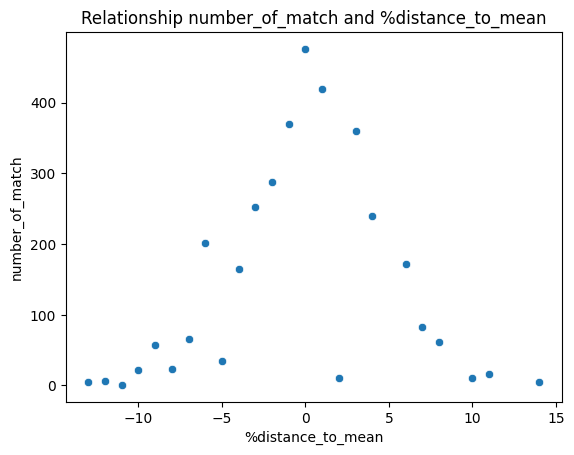

In [92]:
sns.scatterplot(y='number_of_match', x='%distance_to_mean', data=df_compare)
plt.title('Relationship number_of_match and %distance_to_mean')
plt.show()

In [93]:
higher_than_mean_chance =(len(df_match_winners_with_player_height[df_match_winners_with_player_height['%distance_to_mean'] > 0])/len(df_match_winners_with_player_height))*100
higher_than_mean_chance

41.1606341609333

In [94]:
mean_chance = len(df_match_winners_with_player_height[df_match_winners_with_player_height['%distance_to_mean'] == 0])/len(df_match_winners_with_player_height)*100
mean_chance

14.238707747532157

In [95]:
lower_than_mean_chance = (len(df_match_winners_with_player_height[df_match_winners_with_player_height['%distance_to_mean'] < 0])/len(df_match_winners_with_player_height))*100
lower_than_mean_chance

44.60065809153455